In [2]:
import numpy as np 
import networkx as nx 
from networkx import grid_graph
import matplotlib.pyplot as plt 
from random import sample
import seaborn as sns 
import pandas as pd 

In [1]:
def init(N,k):
    G=nx.generators.lattice.grid_graph(dim=[int(np.sqrt(N)),int(np.sqrt(N))],periodic=True)
    pos=dict((n,n) for n in G.nodes())
    random_nodes=sample(list(G.nodes()),k)

    attrs={}

    for item in G.nodes():
        if item in random_nodes:
            attrs[item]='i'
        else:
            attrs[item]='s'

  
    nx.set_node_attributes(G,attrs,"now")
    nx.set_node_attributes(G,attrs,'tomorrow')

    return G,random_nodes
    #fig=plt.figure(figsize=(5,5))
    #nx.draw(G,pos=pos,node_size=75)

#for item in G.nodes:
    
    #if G.nodes[item]['now']=='i':
        #print(item)
        # 
def organize(x,e,l):
    for index,item in enumerate(x):
        x[index]=np.append(item,([item[-1]]*(l-len(item))))
    return np.stack(x,axis=0) 

def sir(N,k,time,r,p):
    G,random_nodes=init(N,k)
    i=[]
    i.extend(random_nodes)

    S=np.zeros(time)
    I=np.zeros(time) 
    R=np.zeros(time)
    I[0]=k
    R[0]=0
    S[0]=N-I[0]-R[0]
    R_inf=[]
    #for t in range(time):
    t=0
    while t<time:
        new_i=[]
        #print(set(i))
        #print('i:',i)
        for node in i: 
            random=np.random.rand(4)
            affected=list(G.neighbors(node))
            for index,number in enumerate(random):
                if number<p and G.nodes[affected[index]]['now']=='s' and G.nodes[affected[index]]['tomorrow']=='s':
                    new_i.append(affected[index])
                    G.nodes[affected[index]]['tomorrow']='i'
                    #print('new:',affected[index])
    
        random=np.random.rand(len(i))
        cured=[]
        for index,number in enumerate(random):
            if number<r:
                G.nodes[i[index]]['tomorrow']='r'
                cured.append(i[index])
                R[t]+=1

        #print(cured)
        for item in new_i:
            G.nodes[item]['now']=G.nodes[item]['tomorrow']
     
        for item in cured:
            G.nodes[item]['now']=G.nodes[item]['tomorrow']
   
        
        for item in cured:
            i.remove(item)
        i.extend(new_i)
        I[t]=len(i)
        R[t]=R[t-1]+R[t]
        S[t]=N-I[t]-R[t]
        if len(i)==0 and t<time:
            S[t+1:]=S[t]
            R[t+1:]=R[t]
            break
        t+=1
        if t==time and len(i)!=0:
            print('y')
            time+=time
            S=np.append(S,np.zeros(time))
            I=np.append(I,np.zeros(time))
            R=np.append(R,np.zeros(time))
    return S,I,R



In [138]:
N=1024
k=1
time=100
p=0.25
r=0.5
en_nubmer=2000
#S,I,R=0,0,0
meta_S,meta_I,meta_R=[],[],[]
R_inf=[]
for e in range(en_nubmer):
    S1,I1,R1=sir(N,k,time,r,p)
    #df1,df2,df3=organize(S1,I1,R1)
    #S+=S1 
    #I+=I1 
    #R+=R1
    meta_S.append(S1)
    meta_I.append(I1)
    meta_R.append(R1)
    R_inf.append(R1[-1])

mm=max([len(i) for i in meta_S])
S=organize(meta_S,en_nubmer,mm)
I=organize(meta_I,en_nubmer,mm)
R=organize(meta_R,en_nubmer,mm)

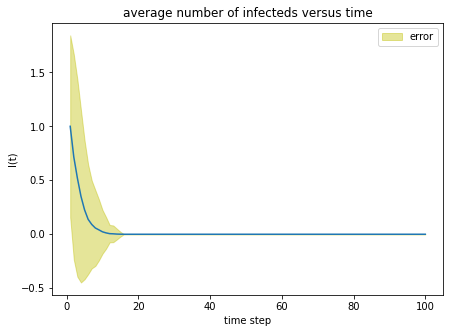

In [139]:
param=I
x=range(1,param.shape[1]+1)
y=np.mean(param,axis=0)
error=np.std(param,axis=0)
fig=plt.figure(figsize=(7,5))
plt.plot(x,y)
plt.fill_between(x, y-error, y+error,alpha=0.4,color='y',label='error')
plt.xlabel('time step')
plt.ylabel('I(t)')
plt.title('average number of infecteds versus time')
plt.legend()
#plt.savefig('I for p=%0.2f.pdf'%p,bbox_inches='tight')
plt.show()


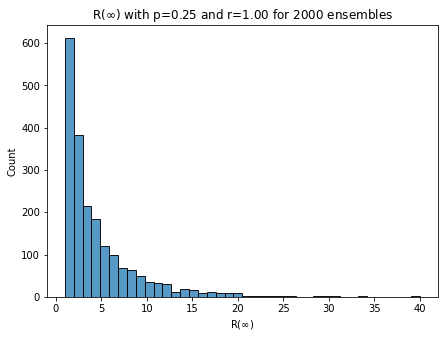

In [140]:
import seaborn as sns
fig=plt.figure(figsize=(7,5)) 
sns.histplot(R_inf,bins=40)
plt.xlabel('R($\infty$)')
plt.title('R($\infty$) with p=%.2f and r=%0.2f for %i ensembles'%(p,r,en_nubmer))
#fig.savefig('r infty hist.pdf',bbox_inches='tight')
plt.show()

In [160]:
N=256
k=1
time=100
p_l=[0.4,0.5,0.6,0.7]
r=0.8
en_nubmer=2000
d={}
for p in p_l: 
    print(p)
    meta_S,meta_I,meta_R=[],[],[]
    R_inf=[]
    for e in range(en_nubmer):
        S1,I1,R1=sir(N,k,time,r,p)
        meta_S.append(S1)
        meta_I.append(I1)
        meta_R.append(R1)
        R_inf.append(R1[-1])

    mm=max([len(i) for i in meta_S])
    S=organize(meta_S,en_nubmer,mm)
    I=organize(meta_I,en_nubmer,mm)
    R=organize(meta_R,en_nubmer,mm)
    d[p]=(S,I,R,R_inf)

0.4
0.5
0.6
0.7


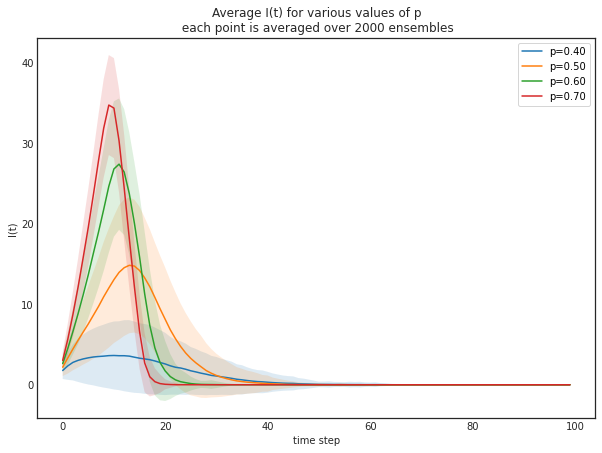

In [161]:
param=1 #0 to 2 values
with plt.style.context('seaborn-white'):
    fig=plt.figure(figsize=(10,7))
    ax=fig.add_subplot(111)
    for item in d:
        x=range(d[item][param].shape[1])
        y=np.mean(d[item][param],axis=0)
        error=np.std(d[item][param],axis=0)
        ax.plot(np.mean(d[item][param],axis=0),alpha=1,label='p=%0.2f'%item)
        plt.fill_between(x, y-error, y+error,alpha=0.15)
plt.legend()
ax.set_xlabel('time step')
ax.set_ylabel('I(t)')
ax.set_title('Average I(t) for various values of p\n each point is averaged over %i ensembles'%en_nubmer)
plt.savefig('whole I r=%0.2f.pdf'%r,bbox_inches='tight')

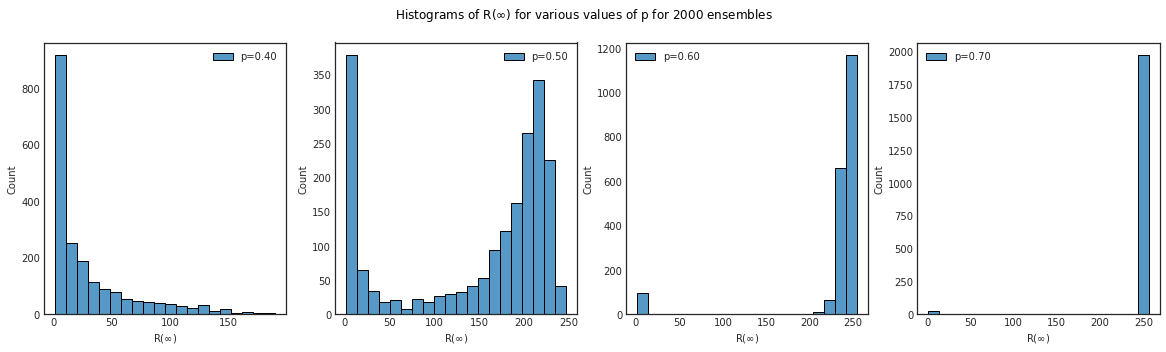

In [96]:
param=3 #0 to 2 values
with plt.style.context('seaborn-white'):
    fig,ax=plt.subplots(1,4,figsize=(20,5))
    #ax=fig.add_subplot(111)
    for index,item in enumerate(d):
        sns.histplot(d[item][param],ax=ax[index],bins=20,label='p=%0.2f'%item)
        ax[index].legend()
        ax[index].set_xlabel('R($\infty$)')
fig.suptitle('Histograms of R($\infty$) for various values of p for %i ensembles'%en_nubmer)
plt.savefig('whole hist.pdf',bbox_inches='tight')

# Phase transition 

In [152]:
N=256
k=1
time=500
p_l=np.linspace(0,1,30)
r=0.8
en_nubmer=2000
R_inf=[]
phase=[]
dd={}
for p in p_l:
    print(p)
    R_inf=[]
    for e in range(en_nubmer):
        S1,I1,R1=sir(N,k,time,r,p)
        #S+=S1 
        #I+=I1 
        #R+=R1
        R_inf.append(R1[-1])
    phase.append((np.mean(R_inf),np.std(R_inf)))
    

0.0
0.034482758620689655
0.06896551724137931
0.10344827586206896
0.13793103448275862
0.1724137931034483
0.20689655172413793
0.24137931034482757
0.27586206896551724
0.3103448275862069
0.3448275862068966
0.3793103448275862
0.41379310344827586
0.4482758620689655
0.48275862068965514
0.5172413793103449
0.5517241379310345
0.5862068965517241
0.6206896551724138
0.6551724137931034
0.6896551724137931
0.7241379310344828
0.7586206896551724
0.7931034482758621
0.8275862068965517
0.8620689655172413
0.896551724137931
0.9310344827586207
0.9655172413793103
1.0


In [153]:
means=[i[0] for i in phase]
error=[i[1] for i in phase]

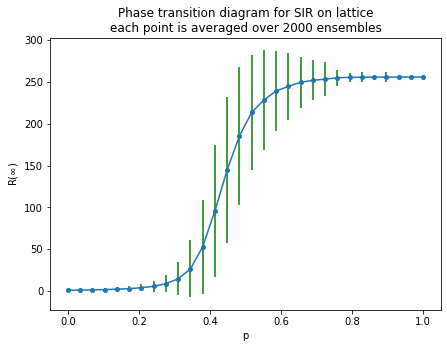

In [154]:
fig=plt.figure(figsize=(7,5))
plt.errorbar(p_l,means,yerr=error,ms=4,fmt='-o',ecolor='g')
plt.xlabel('p')
plt.ylabel('R($\infty$)')
plt.title('Phase transition diagram for SIR on lattice\neach point is averaged over %i ensembles'%en_nubmer)
plt.savefig('phase transition r=%0.2f.pdf'%r,bbox_inches='tight')

In [118]:
df=pd.read_csv('Bombay.CSV')

In [129]:
import scipy 
def f(x,a,b,c):
    return a*(1/(np.cosh(b*x-c)))**2
curve,cov = scipy.optimize.curve_fit(f,df['week'],df['death'], p0=[890,0.2,3.4])



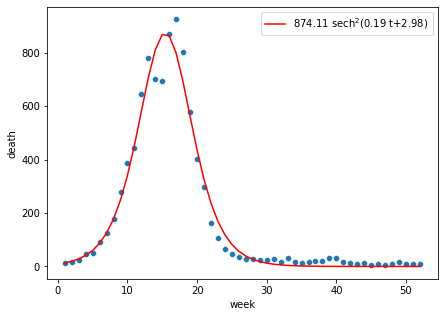

In [130]:
fig=plt.figure(figsize=(7,5))
sns.scatterplot(x='week',y='death',data=df,marker='o')
plt.plot(df['week'],f(df['week'],curve[0],curve[1],curve[2]),color='r',label='%0.2f sech$^2$(%0.2f t+%0.2f)'%(curve[0],curve[1],curve[2]))
plt.legend()
plt.savefig('bombay.pdf',bbox_inches='tight')

In [137]:
curve

array([8.74110645e+02, 1.93253048e-01, 2.97987707e+00])

In [136]:
np.sqrt(np.diag(cov))

array([2.25241666e+01, 6.14427849e-03, 9.74313887e-02])